In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, butter, sosfilt

# Ruta del archivo generado por GNU Radio
file_path = 'Ruido_Salida_1_06.txt'

# Leer los datos del archivo
data = np.fromfile(file_path, dtype=np.float32)
# Demodular la señal AM (extraer la envolvente)
envolvente = np.abs(data)

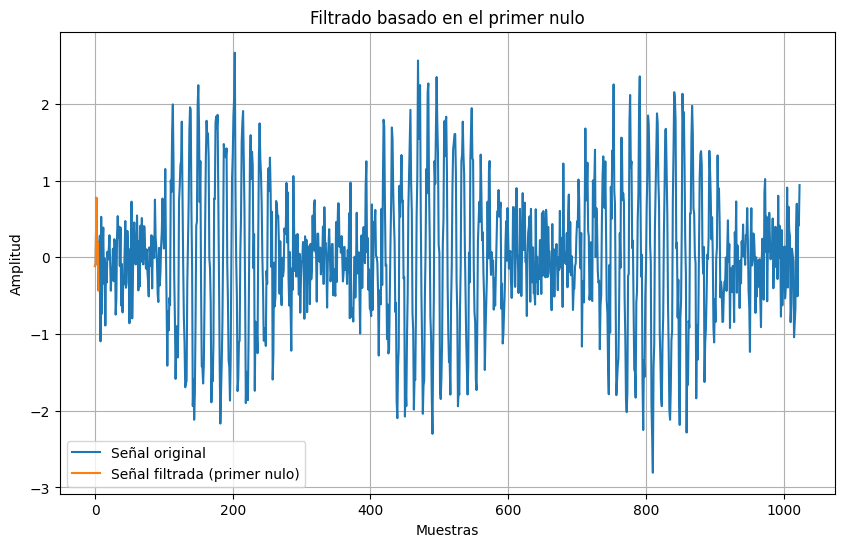

In [2]:
# Implementación del criterio del primer nulo
from scipy.signal import find_peaks

# Encontrar el pico máximo de la envolvente
max_peak = np.max(envolvente)
peaks, _ = find_peaks(envolvente)

# Encontrar el primer nulo después del pico máximo
first_null_idx = peaks[np.argmax(peaks > np.argmax(envolvente))]

# Ancho de banda basado en el criterio del primer nulo
bandwidth_first_null = np.abs(first_null_idx - np.argmax(envolvente))
filtered_signal_first_null = data[:bandwidth_first_null]

# Visualización de la señal original y filtrada (criterio del primer nulo)
plt.figure(figsize=(10, 6))
plt.plot(data, label='Señal original')
plt.plot(filtered_signal_first_null, label='Señal filtrada (primer nulo)')
plt.legend()
plt.title('Filtrado basado en el primer nulo')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()


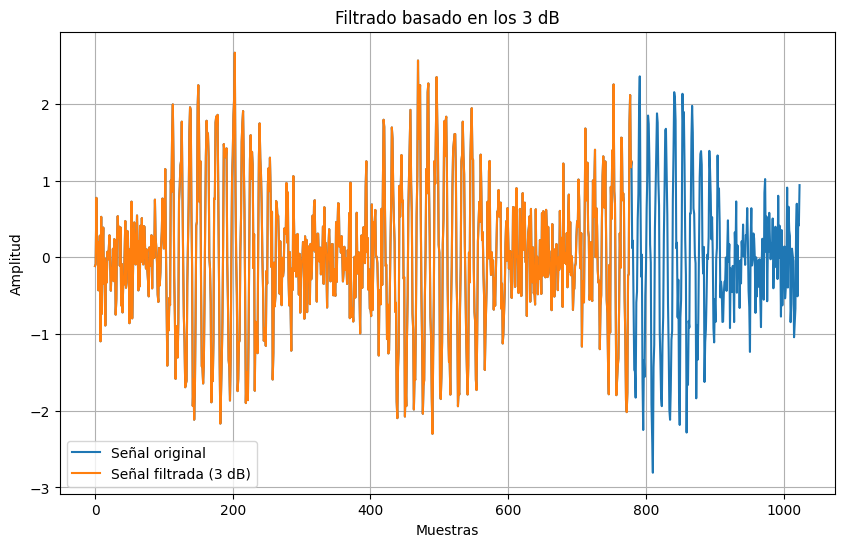

In [3]:
# Implementación del criterio de los 3 dB
half_power = max_peak / 2
indices_half_power = np.where(envolvente >= half_power)[0]

# Ancho de banda basado en el criterio de los 3 dB
bandwidth_3dB = indices_half_power[-1] - indices_half_power[0]
filtered_signal_3dB = data[:bandwidth_3dB]

# Visualización de la señal original y filtrada (criterio de los 3 dB)
plt.figure(figsize=(10, 6))
plt.plot(data, label='Señal original')
plt.plot(filtered_signal_3dB, label='Señal filtrada (3 dB)')
plt.legend()
plt.title('Filtrado basado en los 3 dB')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()


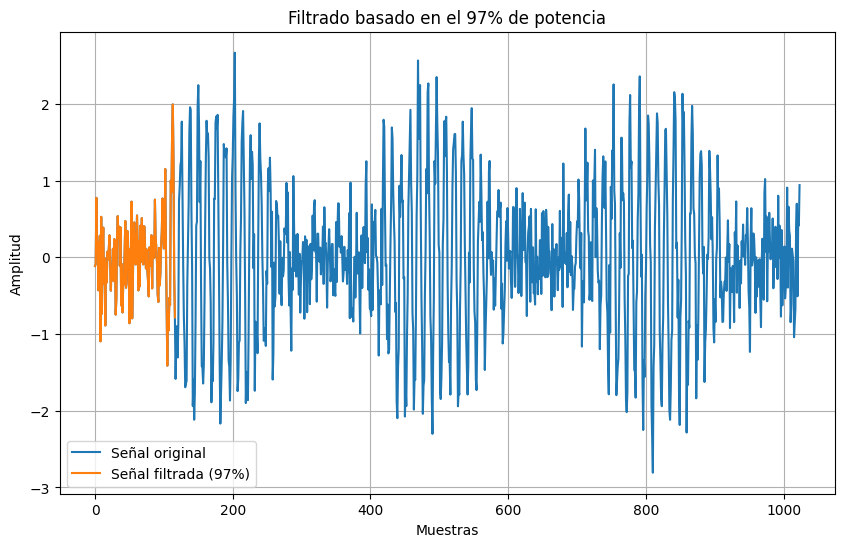

In [4]:
# Implementación del criterio del 97%
total_power = np.sum(envolvente**2)
cumulative_power = np.cumsum(envolvente**2)
threshold_97percent = 0.97 * total_power
indices_97percent = np.where(cumulative_power >= threshold_97percent)[0]

# Ancho de banda basado en el criterio del 97%
bandwidth_97percent = indices_97percent[-1] - indices_97percent[0]
filtered_signal_97percent = data[:bandwidth_97percent]

# Visualización de la señal original y filtrada (criterio del 97%)
plt.figure(figsize=(10, 6))
plt.plot(data, label='Señal original')
plt.plot(filtered_signal_97percent, label='Señal filtrada (97%)')
plt.legend()
plt.title('Filtrado basado en el 97% de potencia')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Función para aplicar criterio del primer nulo
def apply_first_null_criteria(envolvente):
    max_peak = np.max(envolvente)
    peaks, _ = find_peaks(envolvente)
    first_null_idx = peaks[np.argmax(peaks > np.argmax(envolvente))]
    bandwidth_first_null = np.abs(first_null_idx - np.argmax(envolvente))
    return bandwidth_first_null

# Función para aplicar criterio de los 3 dB
def apply_3dB_criteria(envolvente):
    max_peak = np.max(envolvente)
    half_power = max_peak / 2
    indices_half_power = np.where(envolvente >= half_power)[0]
    bandwidth_3dB = indices_half_power[-1] - indices_half_power[0]
    return bandwidth_3dB

# Función para aplicar criterio del 97%
def apply_97percent_criteria(envolvente):
    total_power = np.sum(envolvente**2)
    cumulative_power = np.cumsum(envolvente**2)
    threshold_97percent = 0.97 * total_power
    indices_97percent = np.where(cumulative_power >= threshold_97percent)[0]
    bandwidth_97percent = indices_97percent[-1] - indices_97percent[0]
    return bandwidth_97percent

# Iterar sobre los archivos
for XX in ['01', '1', '3']:
    for YY in range(0, 31, 3):
        # Construir el nombre del archivo
        file_name = f'Ruido_Salida_{XX}_{YY:02}.txt'

        # Leer los datos del archivo
        file_path = file_name
        data = np.fromfile(file_path, dtype=np.float32)

        # Demodulación de la señal AM (detección de envolvente)
        envolvente = np.abs(data)

        # Aplicar criterios de filtro
        bandwidth_first_null = apply_first_null_criteria(envolvente)
        bandwidth_3dB = apply_3dB_criteria(envolvente)
        bandwidth_97percent = apply_97percent_criteria(envolvente)

        # Filtrado de la señal según los criterios
        filtered_signal_first_null = data[:bandwidth_first_null]
        filtered_signal_3dB = data[:bandwidth_3dB]
        filtered_signal_97percent = data[:bandwidth_97percent]

        # Configurar el título de la figura
        title = f'Comparación m = {XX} con SNR = {YY}'
        
        # Visualización de las señales originales y filtradas
        plt.figure(figsize=(15, 10))
        plt.suptitle(title)

        # Señal original
        plt.subplot(4, 1, 1)
        plt.plot(data, label='Señal original')
        plt.legend()
        plt.title('Señal original')

        # Señal filtrada por criterio del primer nulo
        plt.subplot(4, 1, 2)
        plt.plot(filtered_signal_first_null, label='Filtrada (primer nulo)')
        plt.legend()
        plt.title('Filtrado por primer nulo')

        # Señal filtrada por criterio de los 3 dB
        plt.subplot(4, 1, 3)
        plt.plot(filtered_signal_3dB, label='Filtrada (3 dB)')
        plt.legend()
        plt.title('Filtrado por 3 dB')

        # Señal filtrada por criterio del 97%
        plt.subplot(4, 1, 4)
        plt.plot(filtered_signal_97percent, label='Filtrada (97%)')
        plt.legend()
        plt.title('Filtrado por 97%')

        plt.tight_layout()
        
        # Guardar la figura con un nombre específico
        save_name = f'Comparacion_{XX}_{YY}.png'
        plt.savefig(save_name)

        plt.close()  # Cerrar la figura actual para liberar memoria
